In [ ]:
'''

.....IMPORTANT USAGE INSTRUCTIONS........

    IF USING CHPC - UTAH

        Download this Jupyter Notebook to a local location on your Computer

        Go to https://ondemand.chpc.utah.edu and sign in using your uNID and Password.

        At the Top of the Page, notice the Menu "Interactive Apps". Click and Choose "Jupyter Notebook on Notchpeak"

        A form will open, enter all details, and then Launch a Jupyter Notebook. It will take a minute.

        Click on "Connect to Jupyter"

        Once Jupyter Launches. On Top Right Notice "Upload Button". Use this to Upload this Notebook.

        The Notebook will be uploaded. Finish writing the Code whereever specified.

        Run each Block of Code and then finally download the Jupyter Notebook by going to File >> Download as >>


    IF USING GOOGLE COLAB

        Download this Jupyter Notebook to a local location on your Computer

        Go to https://colab.research.google.com/ and sign in using your Google Account - So that your work is saved 
        in your Google Drive permanently.

        Go to File >> Upload Notebook.

        Finish writing the Code whereever specified.

        Run each Block of Code ad then finally download the Jupyter Notebook by going to File >> Download .ipynb

'''

In [ ]:
'''
.....IMPORTANT SUBMISSION INSTRUCTIONS........

Once everything runs successfully, download the jupyter notebook and attach that to your submission in Canvas. 
During evaluation, I will run your Jupyter Notebook to verify that everything is running as expected.

Do not forget to include your main results and plots in your latex file (with other homework questions) 
before submission.

'''

In [ ]:
%matplotlib inline

import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import json, string
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
'''

Alexnet by default is pretrained on imagenet dataset with 1000 classes. Therefore to use Alexnet out of the box 
on any image, we first need to import description of the imagenet classes. A textfile with all imagenet classes
are provided. We will import it as it is.

'''

with open('imagenet_classes.txt') as f:
  labels = [line.strip() for line in f.readlines()]

In [ ]:
print(labels)

torch.Size([1, 1000])


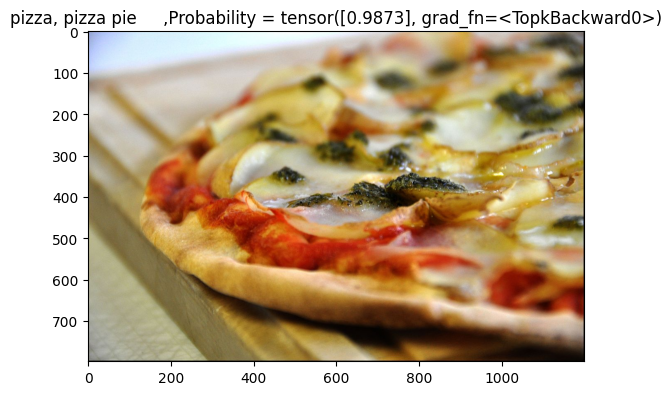

In [46]:
'''
Step - 1 : Download the pretrained Alexnet
'''

alexnet = models.alexnet(weights = models.AlexNet_Weights.DEFAULT)


'''
Optional - Print out the structure of Alexnet
'''

# print(alexnet)


'''
Step - 2 : Always a good practice to preprocess the images(s)
'''

preprocessFn = transforms.Compose([transforms.Resize(256),
                                   transforms.CenterCrop(224),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                                        std=[0.229, 0.224, 0.225])])

'''
Step - 3 : Instantiate Alexnet in Eval Mode
'''

alexnet.eval()

'''
Step - 4 : Load a Test Image and Preprocess 
'''
path = "./Test-Images/pizza.jpg"
image = Image.open(path).convert('RGB')
inputVar =  Variable(preprocessFn(image).unsqueeze(0))


'''
Step - 5 : Run the Image through Alexnet
'''
predictions = alexnet(inputVar)
print(predictions.shape)

'''
Step - 6 : Output the Top Probability
'''
probs = F.softmax(predictions[0], dim = 0).topk(1)


'''
Step - 7 : Out the Image with Label and Probability
'''

plt.title(labels[predictions.argmax().item()] + '     ,Probability = ' + str(probs[0]))
plt.imshow(image);


In [ ]:
#Code to extract 1st Layer from Alexnet and Display shape

'''
Import the image and preprocess
'''

path = "Test-Images/dog.png"
image_c = Image.open(path).convert('RGB')
iVar =  Variable(preprocessFn(image_c).unsqueeze(0))

transformation = transforms.RandomInvert(1)
iVar = transformation(iVar)

'''
Extract the first Convolutional Layer
'''
feature_extraction = [child for child in alexnet.children()][0]
convolution_layer = feature_extraction[0]

'''
Run the image through this convolutional layer. Print out the shape and also the image representation.
'''
out = convolution_layer.forward(iVar)
print(out[0][0].shape)

'''
Note - The first Convolutional Layer extracts the outlines of the figure.
'''
plt.imshow(out[0][0].detach().numpy())

'''
*********
Write the code that outputs a grid (8x8) of the 64 images you get as the output of the first convolutional layer
*******
'''



plt.subplots(8,8,figsize=(20,20))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(out[0][i].detach().numpy())
    plt.axis('off')

In [ ]:
'''Now visualize the filters
* Look how I am extracting the weights of the 51th filter of the first channel 
and just extend it to create a grid plot of the 64 filters 
'''

plt.imshow(alexnet.features[0].weight.data[50,0,:,:])

plt.subplots(8,8,figsize=(20,20))
for i in range(64):
    image = alexnet.features[0].weight.data[i,0,:,:]
    plt.subplot(8,8,i+1)
    plt.imshow(image)
    plt.axis('off')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['chain', 'pretzel', 'chain mail, ring mail, mail, chain armor, chain armour, ring armor, ring armour', 'nematode, nematode worm, roundworm', 'brain coral']


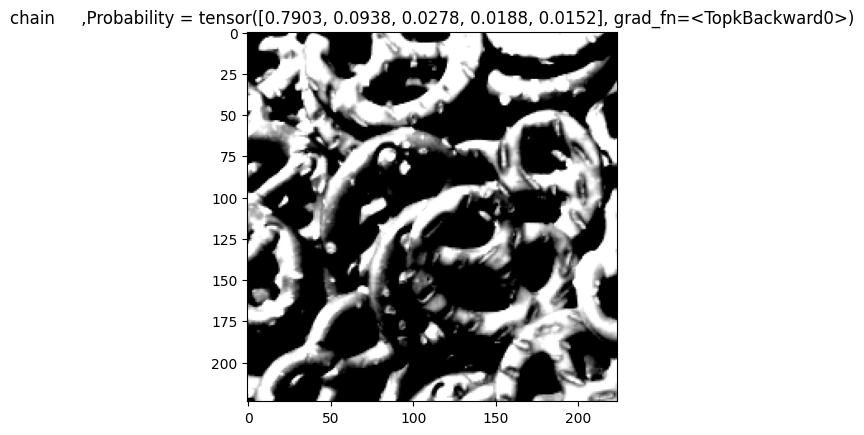

In [75]:
'''Here you will feed to the network your own image. And output the top 5 probabilities of the predicted classes.
* Make sure you make some preprocessing to it, you can also try blurring the image and see what happens
* Make sure your image class corresponds to one of the 1000 classes of alexnet
'''




path = "./Test-Images/pretzel3.png"
image = Image.open(path).convert('RGB')
inputVar =  Variable(preprocessFn(image).unsqueeze(0))

transform = transforms.Grayscale(3)
inputVar = transform(inputVar)

predictions = alexnet(inputVar)
probs = F.softmax(predictions[0], dim = 0).topk(5)


top_5_labels = [labels[i] for i in probs[1]]

print(top_5_labels)

# imshow transformed image
plt.title(labels[predictions.argmax().item()] + '     ,Probability = ' + str(probs[0]))
plt.imshow(inputVar[0].permute(1,2,0).detach().numpy());
